In [1]:
# Setup
checkpoints_path = '/Users/alukasik/Documents/IDEO/Developer/checkpoints/chairs-25-5-18/checkpoint.ckpt'
batch_size = 64 # must match batch size of saved session
img_shape = (256, 256)

In [2]:
# imports

%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import math


from utils import pixels01, pixels11
from model import Model as M

/anaconda3/envs/chairs/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
savechair = []

In [4]:
def imshow(imgs, cols=4):
    fig = plt.figure(figsize=(15,8))
    nimgs = len(imgs)
    rows = math.ceil(float(nimgs)/cols) 
    row = 0
    for i in range(nimgs):
        a=fig.add_subplot(rows, cols, i+1)
        plt.imshow(imgs[i])
        plt.axis('off')

In [5]:
model = M(None, batch_size=batch_size, img_shape=img_shape, checkpoints_path=checkpoints_path)

model.build_model()
model.setup_session()

trying to restore session from /Users/alukasik/Documents/IDEO/Developer/checkpoints/chairs-25-5-18/checkpoint.ckpt
INFO:tensorflow:Restoring parameters from /Users/alukasik/Documents/IDEO/Developer/checkpoints/chairs-25-5-18/checkpoint.ckpt
restored session


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


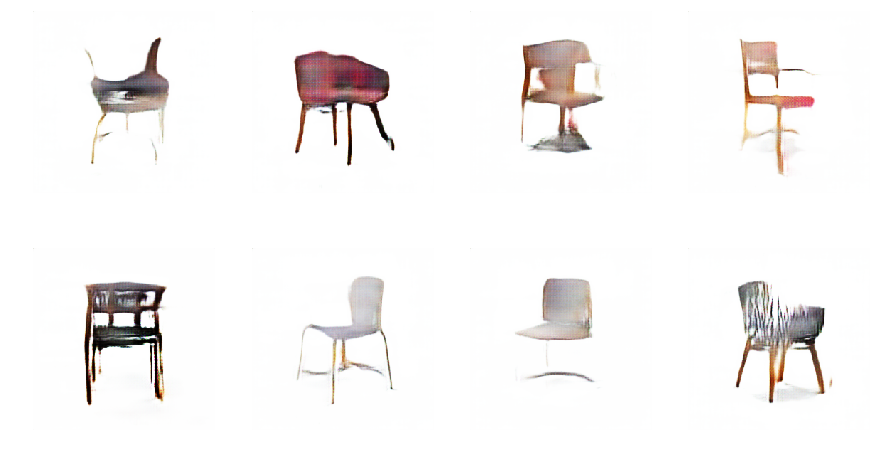

In [69]:
zdraw = np.random.normal(scale=1.0, size=(batch_size, 128)).astype('float32')
imgs = pixels01(model.Gz.eval({ model.Z: zdraw, model.is_training: False }))
imshow(imgs[:8])

In [13]:
savechair.append(zdraw[7,:])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


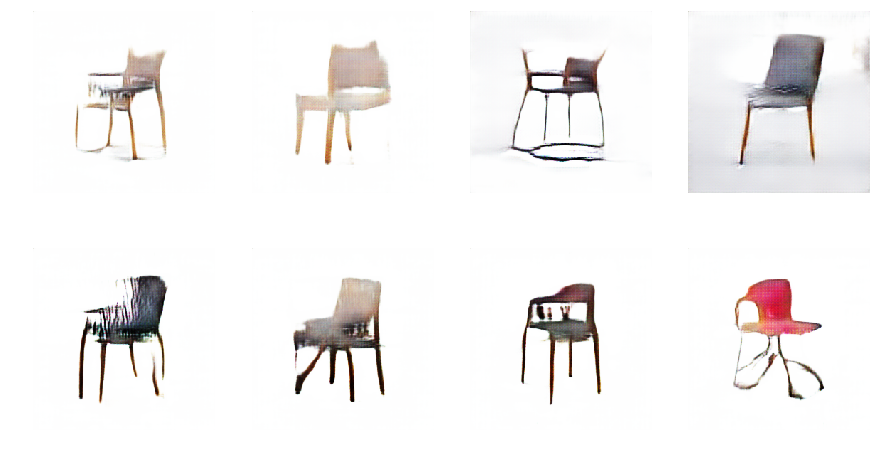

In [8]:
zdraw[0] = (zdraw[2] + zdraw[5]) / 2
#addition of the the 2nd image and 5th image
imgs = pixels01(model.Gz.eval({ model.Z: zdraw, model.is_training: False }))
imshow(imgs[:8])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


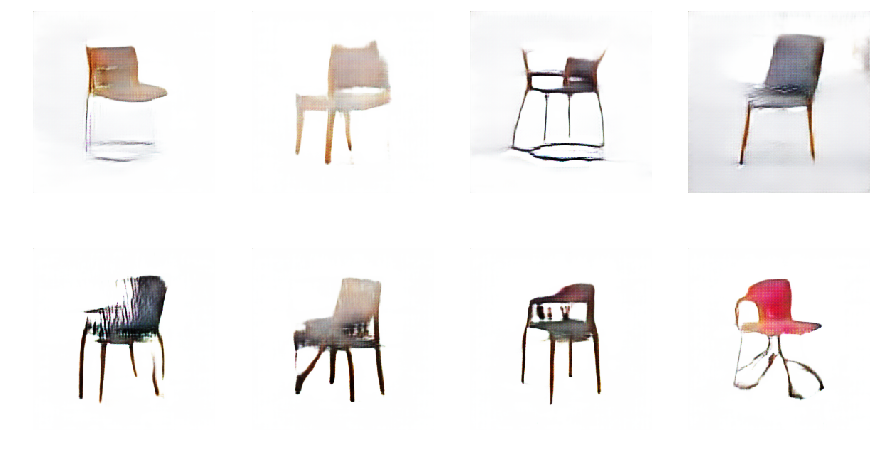

In [9]:
zdraw[0] = -zdraw[5]
imgs = pixels01(model.Gz.eval({ model.Z: zdraw, model.is_training: False }))
imshow(imgs[:8])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


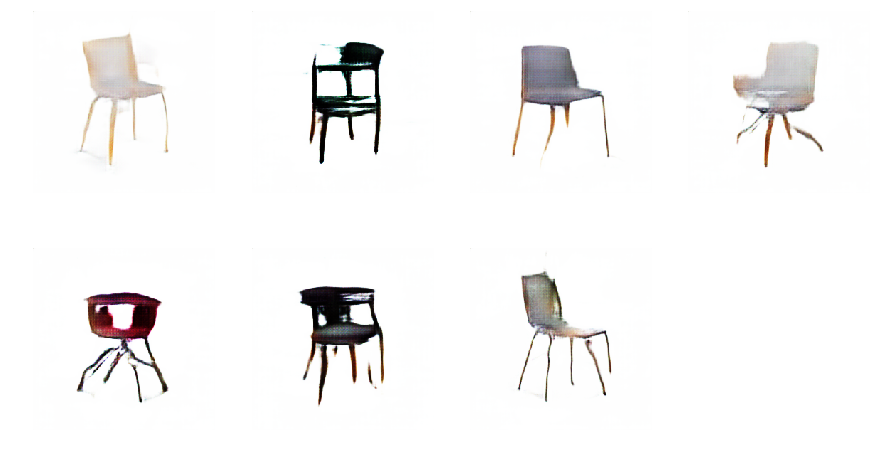

In [10]:
imshow(imgs[17:24])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


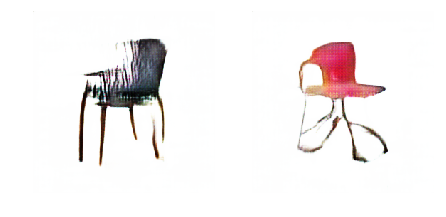

In [15]:
imgs = pixels01(model.Gz.eval({ model.Z: savechair, model.is_training: False }))
imshow(imgs[:8])

In [66]:
n_interps = 12
delta = (savechair[1] - savechair[0]) / n_interps
interpolated = np.zeros((n_interps+1, 128))
interpolated[0,:] = savechair[0]
for i in range(n_interps-1):
    interpolated[i+1,:] = interpolated[i,:] + delta


interpolated[-1,:] = savechair[1]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

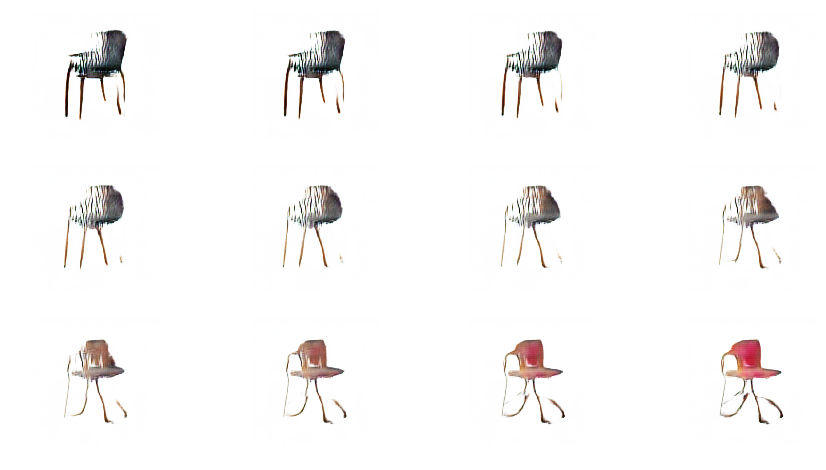

In [68]:
imgs = pixels01(model.Gz.eval({ model.Z: interpolated, model.is_training: False }))
imshow(imgs[:12])

In [16]:
# np.savetxt("chairs.csv", savechair, delimiter=",")